In [31]:
import sys
import pandas as pd
import string
import numpy as np
from scipy import stats
import os
#from multiprocessing import Pool
from os.path import splitext,basename,exists
data_xls_fh='../test/test.xlsx'
info=pd.read_excel(data_xls_fh,'info')
info=info.set_index('varname')
for var in info.iterrows():
    val=info['input'][var[0]]
    #print var[0]
    if not pd.isnull(val):
        exec("%s=info['input']['%s']" % (var[0],var[0]))
    else:
        exec("%s=info['default']['%s']" % (var[0],var[0]))
data_job=pd.read_excel(data_xls_fh,'JobView')
data_job_del_cols=[str(s) for s in data_job.columns if 'Intensity' in str(s) ]
for col in data_job_del_cols:
    exec("del data_job['%s']" % col,locals(), globals())

nd_fns =[str(s) for s in data_job['File Name'].tolist()]
frameis=[int(s) for s in data_job['File Frame Index'].tolist()]

csv_fhs =[]
nums_fhs=[]
nd_fn_framei_tps=[]
for i in range(len(csv_fhs)):
    csv_fhs.append("%s/%s%02d.csv" % (nd_dh,nd_fns[i],frameis[i]))
    nums_fhs.append("%s/%s%02d.csv.nums" % (nd_dh,nd_fns[i],frameis[i]))
    nd_fn_framei_tps.append([nd_fns[i],frameis[i]])
data_job.head()

,Frame Index,Frame Time,Task Name,File Frame Index,File Name,Loop_bleach Index,TimeLapse1 Index,loopAB Index,loopBC Index,loopCD Index,...,loopHI Index,loopIJ Index,loopJK Index,loopKL Index,loopLM Index,loopMN Index,loopNO Index,loopOP Index,loopP Index,Well Name
0,0,00:01:09,CaptureAB,0,WellA01_WellA01_Seq0001.nd2,0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A01
1,1,00:01:10,CaptureAB,0,WellA02_WellA02_Seq0002.nd2,0,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A02
2,2,00:01:11,CaptureAB,0,WellA03_WellA03_Seq0003.nd2,0,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A03
3,3,00:01:12,CaptureAB,0,WellA04_WellA04_Seq0004.nd2,0,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A04
4,4,00:01:13,CaptureAB,0,WellA05_WellA05_Seq0005.nd2,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A05


In [47]:
data_job.set_index(['File Name', 'File Frame Index'], inplace=True)
data_job.head()

KeyError: 'File Name'

In [59]:
for i in range(len(nums_fhs)):  
    nums_fh=nums_fhs[i]
    nums_df=pd.read_csv(nums_fh)
    nd_fn=nd_fn_framei_tps[i][0]
    framei=nd_fn_framei_tps[i][1]
    data_job.loc[(nd_fn,framei),'mean']  =nums_df.loc[0,'mean']
    data_job.loc[(nd_fn,framei),'mode']  =nums_df.loc[0,'mode']
    data_job.loc[(nd_fn,framei),'median']=nums_df.loc[0,'median']
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [67]:
data_job=data_job.reset_index()
data_job.to_csv(data_xls_fh+".nums")
data_job.head()

,File Name,File Frame Index,Frame Index,Frame Time,Task Name,Loop_bleach Index,TimeLapse1 Index,loopAB Index,loopBC Index,loopCD Index,...,loopKL Index,loopLM Index,loopMN Index,loopNO Index,loopOP Index,loopP Index,Well Name,mean,mode,median
0,WellA01_WellA01_Seq0001.nd2,0,0,00:01:09,CaptureAB,0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A01,1496.186939,1475,1461
1,WellA02_WellA02_Seq0002.nd2,0,1,00:01:10,CaptureAB,0,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A02,1531.180050,1468,1512
2,WellA03_WellA03_Seq0003.nd2,0,2,00:01:11,CaptureAB,0,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A03,3519.154533,2876,3353
3,WellA04_WellA04_Seq0004.nd2,0,3,00:01:12,CaptureAB,0,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A04,2968.150936,2867,2928
4,WellA05_WellA05_Seq0005.nd2,0,4,00:01:13,CaptureAB,0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A05,3193.072361,3046,3109


In [68]:
data_mean   =pd.pivot_table(data_job,values='mode',index='Loop_bleach Index',columns='Well Name')
data_mean_P =pd.pivot_table(data_job,values='mode',index='TimeLapse1 Index',columns='Well Name')
data_mean=pd.concat([data_mean,data_mean_P],axis=0)
data_mean=data_mean.reset_index()


In [71]:

data_mean.to_csv(data_xls_fh+'.mode')
data_mean.head()

,index,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,0,1475,1468,2876,2867,3046,2010,2137,1858,2386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1411,1466,2236,2868,3067,2226,2180,1844,2189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1468,1458,2420,2722,2357,2420,2179,1821,2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1506,1460,2549,2946,2483,2130,1916,1826,2489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1460,1403,2491,2948,2924,2244,2099,1980,1971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data_mean_P.head()

Well Name,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
TimeLapse1 Index,,,,,,,,,,,,,,,,,,,,,
0,3445,3805,4415,4512,3150,16106,3647,3839,1848,2359,...,1080,1224,1079,1214,1080,1279,1079,1277,1080,1279
1,3693,4022,4532,4663,3126,16106,3876,3837,1927,2439,...,1142,1208,1160,1277,1079,1285,1079,1279,1151,1279
2,3263,3767,4301,4471,2999,16106,3904,4057,1911,2413,...,1079,1208,1080,1208,1079,1335,1079,1207,1160,1207
3,3639,3959,4479,4663,3063,16107,3639,4157,1975,2431,...,1079,1238,1134,1208,1080,1208,1080,1336,1080,1280
4,3456,4095,4461,4741,3127,16106,3886,3975,2069,2488,...,1080,1246,1080,1208,1079,1224,1080,1272,1151,1208


In [13]:
import sys
from os.path import exists
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.optimize import curve_fit

def exp1_growth(x, a, b, c):
    return a * np.exp( -b * x) + c  

def getrateofrecov(y):
    y=(y - y.min())/(y.max()-y.min()) # norm to min0 max1
#     y=y[~y.isnull()]#remove nans
    x=np.array(range(len(y)))*1.5
    otpt_diff_fitted=pd.Series(index=range(len(x)))
    #for totpts in range(12,4,-1):
        #rate, intercept, r_value, p_value, rate_std_error = stats.linregress(x[:totpts], y[:totpts])
    try:
        #popt, pcov = curve_fit(exp1, x, y,p0=[50,0,-50])
        popt, pcov = curve_fit(exp1_growth, x, y, p0=[0,1,0])
        perr=np.sqrt(np.diag(pcov)) #standard deviation errors
        #print r_value
        if perr[1] < 0.1:
            #predict_y = intercept + rate * x[:totpts]
            ## Plotting
            #plt.plot(x, y, 'o')
            #plt.plot(x[:totpts], predict_y, 'k-')
            #plt.show()
            rate=popt[1]
            otpt_diff_fitted=pd.Series(exp1_growth(x, *popt))
        else:
            rate=np.nan
            print ">>> WARNING : getrateofrecov : standard deviation error (%.4f) > 0.1 " % perr[1]
    except:
        rate=np.nan
        print ">>> WARNING : getrateofrecov : can not fit"
    #alpha=stats.linregress(x,y)
    plt.figure()
    plt.plot(x, y, 'ko', label="Original Noised Data")
    plt.plot(x, exp1_growth(x, *popt), 'r-', label="Fitted Curve")
    plt.legend()
    plt.show()

    return rate,otpt_diff_fitted

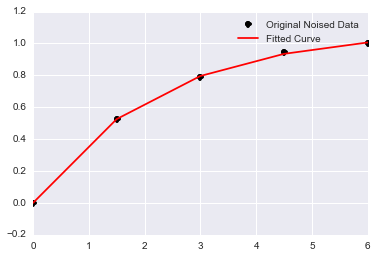

(0.44365420142685996, 0   -0.000232
 1    0.525733
 2    0.796093
 3    0.935065
 4    1.006500
 dtype: float64)

In [14]:
getrateofrecov(np.array([0,1,1.5,1.8,1.9]))

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
